In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import RecurrsiveFeatureSelector

In [2]:
insurance = pd.read_csv('insurance.csv')
label = {key:value for (key,value) in zip(list(insurance['region'].unique()), [i for i in range(0,7)])}
label.update({'male':0, 'female':1, 'yes':0, 'no':1})
insurance.replace(label, inplace=True)

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [4]:
X = insurance.drop('charges', axis=1)
y = insurance[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [6]:
import xgboost as xgb
clf = xgb.XGBRegressor(use_label_encoder=False, verbosity=0)

In [7]:
from sklearn.model_selection import cross_val_score

Trial Started:
Searching the best subset of features with XGBRegressor...
-----------------------------------------------------------Trial 1-----------------------------------------------------------
1/6: ['age']
      Mean Absolute Error: 9313.559, Standard Deviation: 374.5946
 
2/6: ['sex']
      Mean Absolute Error: 9133.8724, Standard Deviation: 360.391
 
3/6: ['bmi']
      Mean Absolute Error: 10219.3304, Standard Deviation: 480.5625
 
4/6: ['children']
      Mean Absolute Error: 9107.7967, Standard Deviation: 355.9167
 
5/6: ['smoker']
      Mean Absolute Error: 5746.2588, Standard Deviation: 126.703
 
6/6: ['region']
      Mean Absolute Error: 9101.1879, Standard Deviation: 408.8551
 
Best Combination of Trial 1: 
     bmi
 
Best Score of Trial 1: 
     10219.3304
 
Time Spent for Trial 1: 0.63(s)
 
-----------------------------------------------------------Trial 2-----------------------------------------------------------
1/5: ['bmi', 'age']
      Mean Absolute Error: -0.3393, 

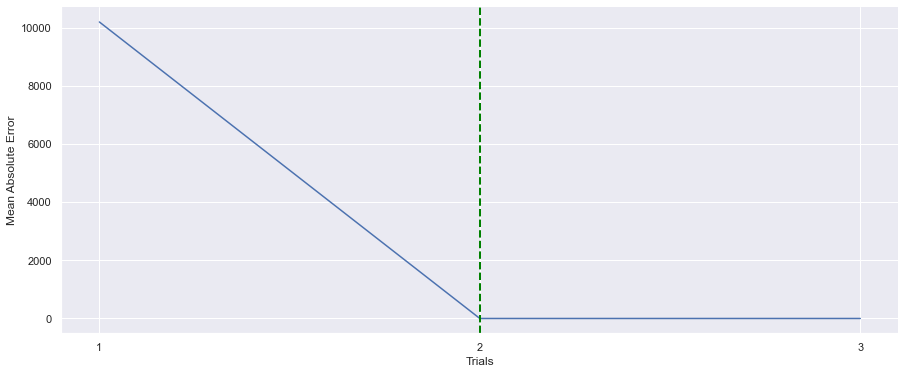

In [8]:
rfs = RecurrsiveFeatureSelector.RecurrsiveFeatureSelector()
rfs.trial(model=clf, 
          X=X_train, 
          y=y_train, 
          cv=3, 
          task='regression',
          scoring='mean_absolute_error',
          max_round=None, 
          chances_to_fail=1, 
          jump_start=None)

In [13]:
rfs.best_com

{'Trial 1': ['bmi'],
 'Trial 2': ['bmi', 'smoker'],
 'Trial 3': ['bmi', 'smoker', 'age']}

In [14]:
rfs.summary

,best_com,best_score,trials_time_spend
Trial 1,[bmi],10219.3304,0.63
Trial 2,"[bmi, smoker]",0.6351,0.97
Trial 3,"[bmi, smoker, age]",0.7662,0.83


In [15]:
rfs.trial_best

('bmi', 'smoker')

In [16]:
rfs.best_score

{'Trial 1': 10219.3304, 'Trial 2': 0.6351, 'Trial 3': 0.7662}